In [16]:
#Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [17]:
# Dummy data: 100 days, 5 features
#Generate Dummy Data
np.random.seed(0)
data = np.random.rand(100, 5) * 100 # Generate random data between 0 and 100

In [18]:
# Preprocess Data
#Normalize the data using MinMaxScaler.
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [19]:
#Build Autoencoder
def build_autoencoder():
    input_layer = Input(shape=(5,))
    encoded = Dense(3, activation='relu')(input_layer)
    decoded = Dense(5, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)

    encoder = Model(inputs=input_layer, outputs=encoded)

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder, encoder

autoencoder, encoder = build_autoencoder()

In [20]:
#Train Autoencoder
history = autoencoder.fit(data_normalized, data_normalized, epochs=50, batch_size=10, shuffle=True, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 21ms/step - loss: 0.1303 - val_loss: 0.1586
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1282 - val_loss: 0.1560
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1263 - val_loss: 0.1536
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1242 - val_loss: 0.1512
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1225 - val_loss: 0.1489
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1206 - val_loss: 0.1466
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1188 - val_loss: 0.1443
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1171 - val_loss: 0.1421
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1155 - val_loss: 0.1400
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1139 - val_loss: 0.1380
Epoch 11/50
8/8 [=====================

In [21]:
# Detect Anomalies
#Calculate reconstruction errors and set a threshold to detect anomalies.
reconstructed_data = autoencoder.predict(data_normalized)
mse = np.mean(np.power(data_normalized - reconstructed_data, 2), axis=1)

4/4 [==============================] - 0s 3ms/step


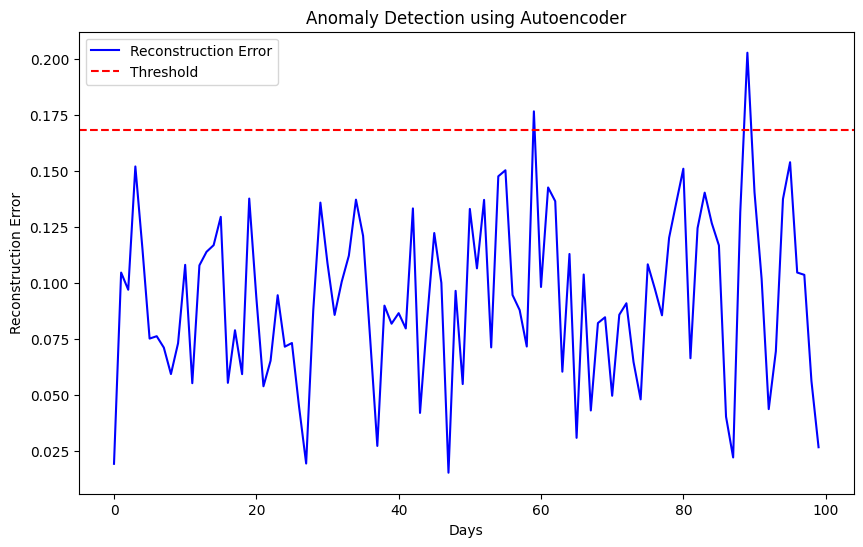

In [22]:
#Plot Results
#Plot the original and reconstructed data, highlighting anomalies
plt.figure(figsize=(10, 6))
plt.plot(mse, label='Reconstruction Error', color='blue')
plt.axhline(np.mean(mse) + 2*np.std(mse), color='red', linestyle='--', label='Threshold')
plt.xlabel('Days')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection using Autoencoder')
plt.legend()
plt.show()
#The plot will show the reconstruction error for each day.
#The red dashed line represents the threshold for anomaly detection.